# Sports Clothing Revenue Analysis

In this notebook, we analyze various aspects of sports clothing products to identify opportunities for increasing revenue. We will examine product data related to pricing, reviews, descriptions, and revenue to provide actionable insights.

## 1. Data Preparation

### 1.1. Import Libraries and Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
brands = pd.read_csv("https://raw.githubusercontent.com/oliviagaffney/oliviagaffney-data-portfolio/main/Analyzing%20Online%20Sports%20Revenue/data/brands.csv")
finance = pd.read_csv("https://raw.githubusercontent.com/oliviagaffney/oliviagaffney-data-portfolio/main/Analyzing%20Online%20Sports%20Revenue/data/finance.csv")
info = pd.read_csv("https://raw.githubusercontent.com/oliviagaffney/oliviagaffney-data-portfolio/main/Analyzing%20Online%20Sports%20Revenue/data/info.csv")
reviews = pd.read_csv("https://raw.githubusercontent.com/oliviagaffney/oliviagaffney-data-portfolio/main/Analyzing%20Online%20Sports%20Revenue/data/reviews.csv")

### 1.2. Merge Data and Clean

In [3]:
# Merge the data and drop null values
merged_df = pd.merge(brands, finance, on="product_id", how="outer")
merged_df = pd.merge(merged_df, info, on="product_id", how="outer")
merged_df = pd.merge(merged_df, reviews, on="product_id", how="outer")
merged_df.dropna(inplace=True)

# Check the merged dataframe
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 1 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3117 non-null   object 
 1   brand          3117 non-null   object 
 2   listing_price  3117 non-null   float64
 3   sale_price     3117 non-null   float64
 4   discount       3117 non-null   float64
 5   revenue        3117 non-null   float64
 6   product_name   3117 non-null   object 
 7   description    3117 non-null   object 
 8   rating         3117 non-null   float64
 9   reviews        3117 non-null   float64
dtypes: float64(6), object(4)
memory usage: 267.9+ KB
None
  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99       0.5  1641.17   
2     CM0081  Adidas           9.99        5.99       0.4   398.93   
3     B44832  Adidas          69.99       34.99       0.5  2204.37   
4     D98205  Adidas      

## 2. Analysis

### 2.1. Volume of Products and Average Revenue by Brand and Price Quartiles

#### 2.1.1. Create Price Labels

In [4]:
# Add price labels based on listing_price quartiles 
merged_df["price_label"] = pd.qcut(merged_df["listing_price"], q=4, labels=["Budget", "Average", "Expensive", "Elite"])

# Check the updated dataframe
print(merged_df.head())

  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99       0.5  1641.17   
2     CM0081  Adidas           9.99        5.99       0.4   398.93   
3     B44832  Adidas          69.99       34.99       0.5  2204.37   
4     D98205  Adidas          79.99       39.99       0.5  5182.70   
5     B75586  Adidas          47.99       19.20       0.6  1555.20   

                                        product_name  \
1               Women's adidas Originals Sleek Shoes   
2                  Women's adidas Swim Puka Slippers   
3   Women's adidas Sport Inspired Questar Ride Shoes   
4           Women's adidas Originals Taekwondo Shoes   
5  Women's adidas Sport Inspired Duramo Lite 2.0 ...   

                                         description  rating  reviews  \
1  A modern take on adidas sport heritage, tailor...     3.3     24.0   
2  These adidas Puka slippers for women's come wi...     2.6     37.0   
3  Inspired by modern t

#### 2.1.2. Aggregate Data

In [5]:
# Group by brand and price_label to get volume and mean revenue
adidas_vs_nike = merged_df.groupby(["brand", "price_label"], as_index=False).agg(
    num_products=("product_id", "count"),
    mean_revenue=("revenue", "mean")
).round(2)

print("Volume of Products and Average Revenue for Adidas and Nike Products:")
print(adidas_vs_nike)

Volume of Products and Average Revenue for Adidas and Nike Products:
    brand price_label  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


#### 2.1.3. Visualize Product Volume and Revenue

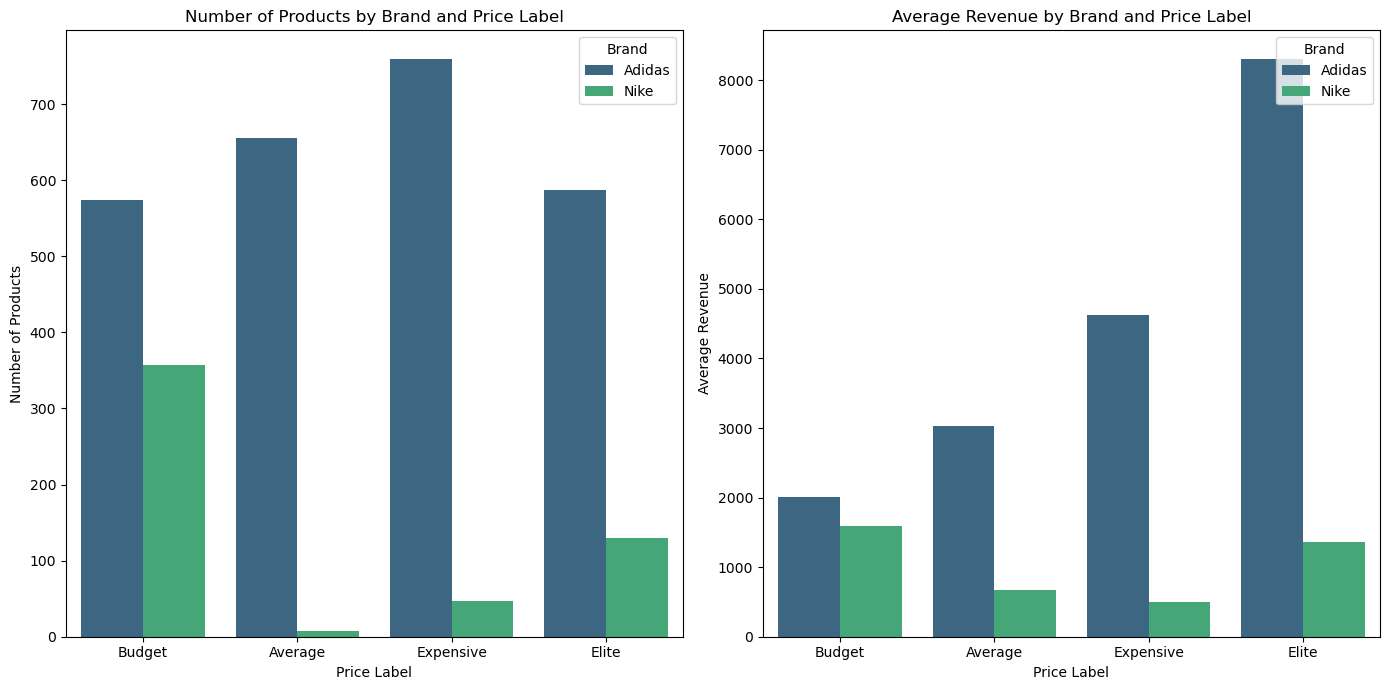

In [6]:
# Set up the visualizations
plt.figure(figsize=(14, 7))

# Plot the number of products
plt.subplot(1, 2, 1)
sns.barplot(data=adidas_vs_nike, x='price_label', y='num_products', hue='brand', palette='viridis')
plt.title('Number of Products by Brand and Price Label')
plt.xlabel('Price Label')
plt.ylabel('Number of Products')
plt.legend(title='Brand', loc='upper right')

# Plot the mean revenue
plt.subplot(1, 2, 2)
sns.barplot(data=adidas_vs_nike, x='price_label', y='mean_revenue', hue='brand', palette='viridis')
plt.title('Average Revenue by Brand and Price Label')
plt.xlabel('Price Label')
plt.ylabel('Average Revenue')
plt.legend(title='Brand', loc='upper right')

plt.tight_layout()
plt.show()

### 2.2. Description Length vs. Mean Rating

#### 2.2.1. Calculate Description Length

In [7]:
# Calculate the length of each description
merged_df["description_length"] = merged_df["description"].str.len()

# Check description length calculation
print(merged_df[["description", "description_length"]].head())

                                         description  description_length
1  A modern take on adidas sport heritage, tailor...                 175
2  These adidas Puka slippers for women's come wi...                 172
3  Inspired by modern tech runners, these women's...                 264
4  This design is inspired by vintage Taekwondo s...                 288
5  Refine your interval training in these women's...                 221


#### 2.2.2. Bin Description Lengths

In [8]:
# Define bins and labels for description lengths
lengths = [0, 100, 200, 300, 400, 500, 600, 700]
labels = ["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700"]

# Cut into bins
merged_df["description_length_bin"] = pd.cut(merged_df["description_length"], bins=lengths, labels=labels, include_lowest=True)

# Check the binned description length
print(merged_df[["description_length", "description_length_bin"]].head())

   description_length description_length_bin
1                 175                101-200
2                 172                101-200
3                 264                201-300
4                 288                201-300
5                 221                201-300


#### 2.2.3. Analyze Description Length Bins

In [9]:
# Group by the bins to get mean rating and number of reviews 
description_lengths = merged_df.groupby("description_length_bin", as_index=False).agg(
    mean_rating=("rating", "mean"),
    num_reviews=("reviews", "count")
).round(2)

print("\nDifferences Between Description Length and Mean Rating:")
print(description_lengths)


Differences Between Description Length and Mean Rating:
  description_length_bin  mean_rating  num_reviews
0                  0-100         2.26            7
1                101-200         3.19          526
2                201-300         3.28         1785
3                301-400         3.29          651
4                401-500         3.35          118
5                501-600         3.12           15
6                601-700         3.65           15


#### 2.2.4. Visualize Description Length vs. Mean Rating

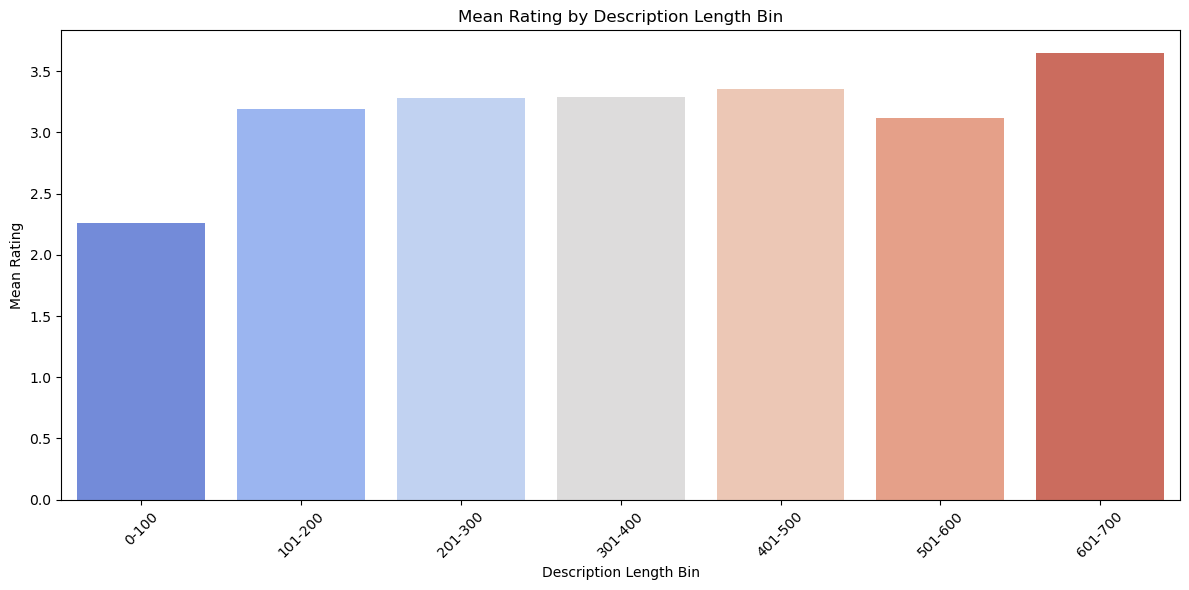

In [10]:
# Set up the visualizations
plt.figure(figsize=(12, 6))

# Plot mean rating by description length bin
sns.barplot(data=description_lengths, x='description_length_bin', y='mean_rating', palette='coolwarm')
plt.title('Mean Rating by Description Length Bin')
plt.xlabel('Description Length Bin')
plt.ylabel('Mean Rating')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Summary of Findings


### 1. Volume of Products and Average Revenue by Brand and Price Quartiles

**Adidas:**

- **Budget:** 574 products with an average revenue of \$2,015.68.
- **Average:** 655 products with an average revenue of \$3,035.30.
- **Expensive:** 759 products with an average revenue of \$4,621.56.
- **Elite:** 587 products with an average revenue of \$8,302.78.

*Insight:* Adidas excels in the "Elite" price category, generating the highest revenue. This suggests that Adidas's high-end products are particularly successful.

**Nike:**

- **Budget:** 357 products with an average revenue of \$1,596.33.
- **Average:** 8 products with an average revenue of \$675.59.
- **Expensive:** 47 products with an average revenue of \$500.56.
- **Elite:** 130 products with an average revenue of \$1,367.45.

*Insight:* Nike has fewer products in premium categories and lower average revenue compared to Adidas, indicating a potential underperformance in higher-end segments.

### 2. Description Length vs. Mean Rating

- **Short Descriptions (0-100 characters):** Products with very short descriptions have lower average ratings (mean rating: 2.26). This suggests that minimal information may not meet customer expectations.
- **Optimal Lengths (201-400 characters):** Products with descriptions in this range tend to have higher ratings (mean rating: 3.28 to 3.35). This length provides a balance of detail and clarity.
- **Long Descriptions (501-700 characters):** While longer descriptions are associated with higher ratings (mean rating: 3.12 to 3.65), they are less common. This indicates that detailed descriptions can enhance ratings but might not always be necessary.


## 4. Recommendations

### 1. Focus on Premium Segments

**Adidas:**

Given the strong performance in the "Elite" category, the company should continue to focus on this segment. Consider expanding the product range and increasing marketing efforts for high-end products to further capitalize on this success.

**Nike:**

Nike should explore strategies to enhance its performance in the "Expensive" and "Elite" categories. This might include developing new premium products, improving product features, or implementing targeted promotions to boost high-end sales.

### 2. Optimize Product Descriptions

- **Recommendation:** Aim for product descriptions that are around 201-400 characters. This length seems to be the sweet spot for balancing detail and customer engagement, leading to higher average ratings.
- **Action:** Review and possibly revise descriptions of existing products that are outside this optimal length range to improve customer satisfaction and ratings.

### 3. Leverage Data-Driven Marketing Strategies

- **Target High-Revenue Segments:** Use insights from the analysis to tailor marketing campaigns for high-revenue products and price categories. Highlight the success of premium products in advertising and promotional materials.
- **Customer Reviews:** Pay attention to customer feedback and ratings as these directly impact revenue. Consider implementing feedback loops where customer reviews are analyzed to continuously improve product offerings and descriptions.

### 4. Monitor and Adjust

- **Continuous Analysis:** Regularly track key metrics such as product volume, average revenue, and customer ratings. Set up periodic reviews to adjust strategies based on the latest data and market trends.
- **Visualization Tools:** Use data visualization tools to keep stakeholders informed about product performance and trends. This can help in making informed decisions and quickly adapting strategies as needed.